<a href="https://colab.research.google.com/github/vivekprj0712/Lok-Sabha-Election-2004-2024-Data-Analysis-Visualization/blob/master/Prob%26Stats_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('FinalElectionData(2004-2024).csv')
df

,PC Name,Caste,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Ahmadnagar,GEN,Maharashtra,Gandhi Dilipkumar Mansukhlal,Bharatiya Janta Party,1517951,787153,0.519,46731,0.059,2009
1,Ahmedabad East,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1411761,597395,0.423,86056,0.144,2009
2,Akola,GEN,Maharashtra,Dhotre Sanjay Shamrao,Bharatiya Janta Party,1480606,740014,0.500,64848,0.088,2009
3,Amreli,GEN,Gujarat,Kachhadia Naranbhai,Bharatiya Janta Party,1312733,524642,0.400,37317,0.071,2009
4,Amritsar,GEN,Punjab,Navjot Singh Sidhu,Bharatiya Janta Party,1241099,814503,0.656,6858,0.008,2009
...,...,...,...,...,...,...,...,...,...,...,...
2708,Uluberia,GEN,West Bengal,Sultan Ahmed,All India Trinamool Congress,1251590,1009905,0.807,98936,0.098,2009
2709,Vaishali,GEN,Bihar,Raghuvansh Prasad Singh,Rashtriya Janata Dal,1278891,624863,0.489,22308,0.036,2009
2710,Valmiki Nagar,GEN,Bihar,Baidyanath Prasad Mahto,Janata Dal (United),1275653,598456,0.469,183675,0.307,2009
2711,Vellore,GEN,Tamil Nadu,Abdul Rahman,Dravida Munetra Kazhagam,1010067,723658,0.716,107393,0.148,2009


# **# Voter Turnout**


Statistics: Average voter turnout, standard deviation, and comparison with previous elections.

Distribution: Frequency distribution of voter turnout across different states or constituencies

## **Statistics ---->**

In [ ]:
# Group the data by year and calculate the average and standard deviation of turnout
turnout_stats = df.groupby('Year')['Turnout'].agg(['mean', 'std']).reset_index()
turnout_stats.columns = ['Year', 'Average Turnout', 'Standard Deviation']

turnout_stats


,Year,Average Turnout,Standard Deviation
0,2004,0.589818,0.118537
1,2009,0.594129,0.140019
2,2014,0.672720,0.102923
3,2019,0.712974,0.116861
4,2024,0.669508,0.100754


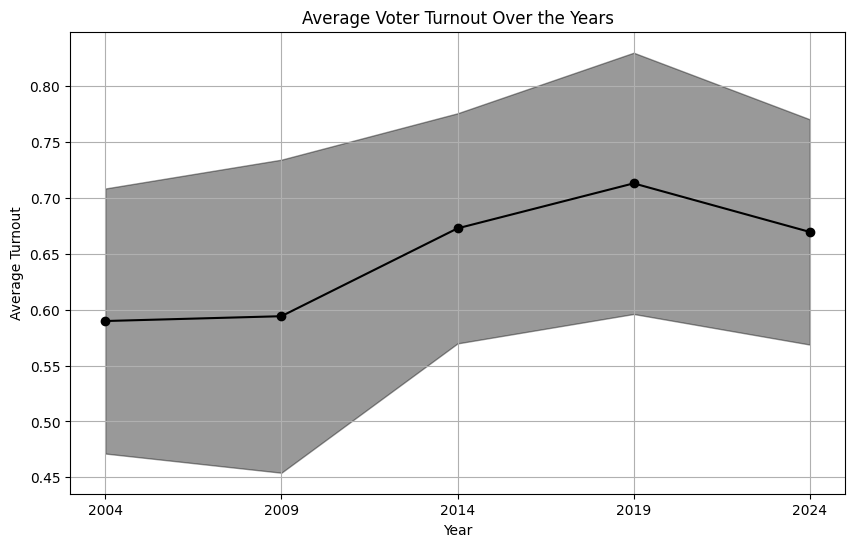

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(turnout_stats['Year'], turnout_stats['Average Turnout'], marker='o', linestyle='-', color='black')
plt.fill_between(turnout_stats['Year'] , turnout_stats['Average Turnout'] - turnout_stats['Standard Deviation'] , turnout_stats['Average Turnout'] + turnout_stats['Standard Deviation'] , color='black', alpha=0.4)
plt.title('Average Voter Turnout Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Turnout')
plt.xticks(turnout_stats['Year'])
plt.grid(True)
plt.show()

## **Distribution ---->**

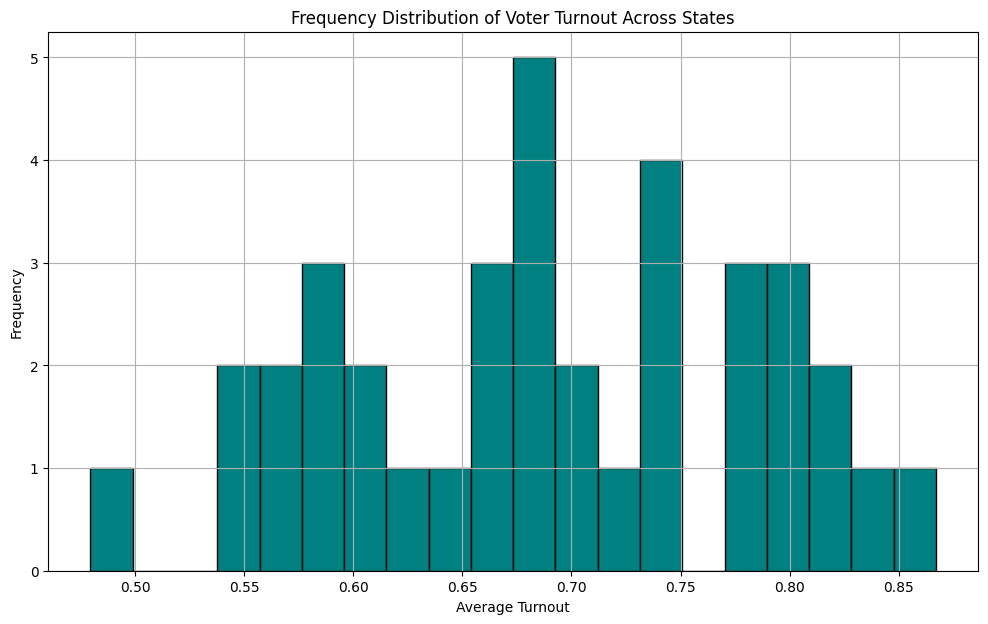

In [ ]:
state_turnout = df.groupby('State')['Turnout'].mean().reset_index()

plt.figure(figsize=(12, 7))
plt.hist(state_turnout['Turnout'], bins=20, color  = 'teal',  edgecolor='k', alpha=1)
plt.title('Frequency Distribution of Voter Turnout Across States')
plt.xlabel('Average Turnout')
plt.ylabel('Frequency')
plt.grid(True)
#plt.xticks(turnout_stats['Average Turnout'])
plt.show()

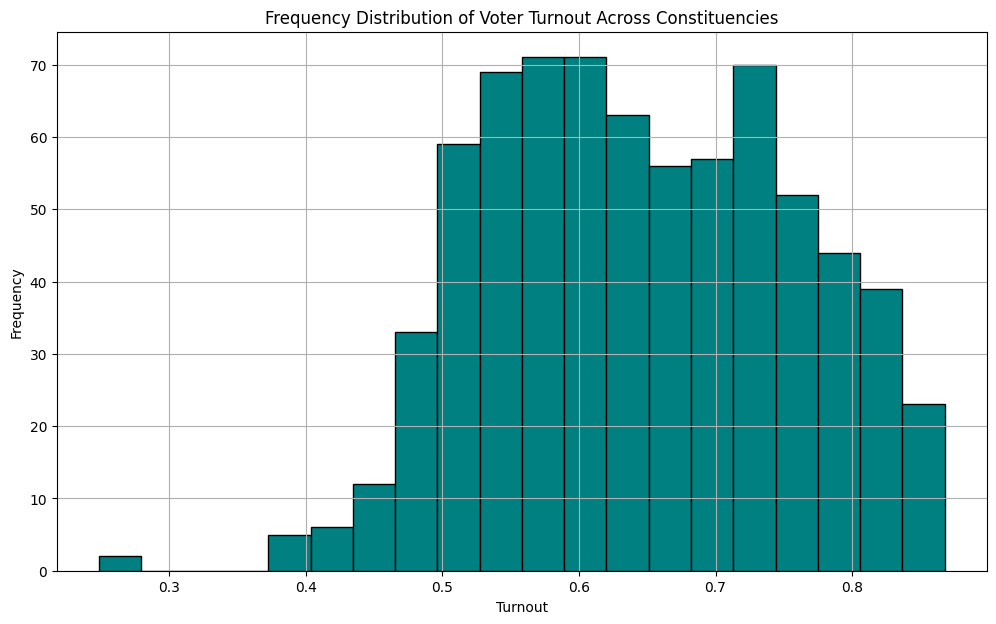

In [ ]:
pc_name_Turnout = df.groupby('PC Name')['Turnout'].mean().reset_index()

plt.figure(figsize=(12, 7))
plt.hist(pc_name_Turnout['Turnout'], bins=20, color = 'teal',  edgecolor='k', alpha=1)
plt.title('Frequency Distribution of Voter Turnout Across Constituencies')
plt.xlabel('Turnout')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# **# Election Results**


Statistics: Mean, median, and mode of votes received by candidates/parties.

Distribution: Distribution of seats won by each party across the country.

## **Statistics --->**

In [ ]:
import scipy.stats as stats

In [ ]:
votes_stats = df.groupby('Party')['Votes'].agg(['mean', 'median' ,  lambda a: stats.mode(a)[0] ]).reset_index()
votes_stats.columns = ['Year', 'Mean', 'Median' , 'Mode' ]
votes_stats

,Year,Mean,Median,Mode
0,Aam Aadmi Party,1.053078e+06,1054615.0,948485
1,Aazad Samaj Party (Kanshi Ram),1.001303e+06,1001303.0,1001303
2,Ajsu Party,1.264833e+06,1264833.0,1264833
3,All India Anna Dravida Munnetra Kazhagam,9.964655e+05,1012667.0,719031
4,All India Forward Bloc,9.635906e+05,947381.0,694449
...,...,...,...,...
73,United Peoples Party Liberal,1.241496e+06,1241496.0,1241496
74,Viduthalai Chiruthaigal Katchi,1.085590e+06,1152929.5,869428
75,Voice Of The People Party,1.037911e+06,1037911.0,1037911
76,Yuvajana Sramika Rythu Congress Party,1.238679e+06,1234655.0,909614


In [ ]:
import seaborn as sns

# Calculate mean, median, and mode for the 'Votes' column
mean_votes = df['Votes'].mean()
median_votes = df['Votes'].median()
mode_votes = df['Votes'].mode()[0]

mean_votes, median_votes, mode_votes


(964864.2539624033, 985637.0, 598332)

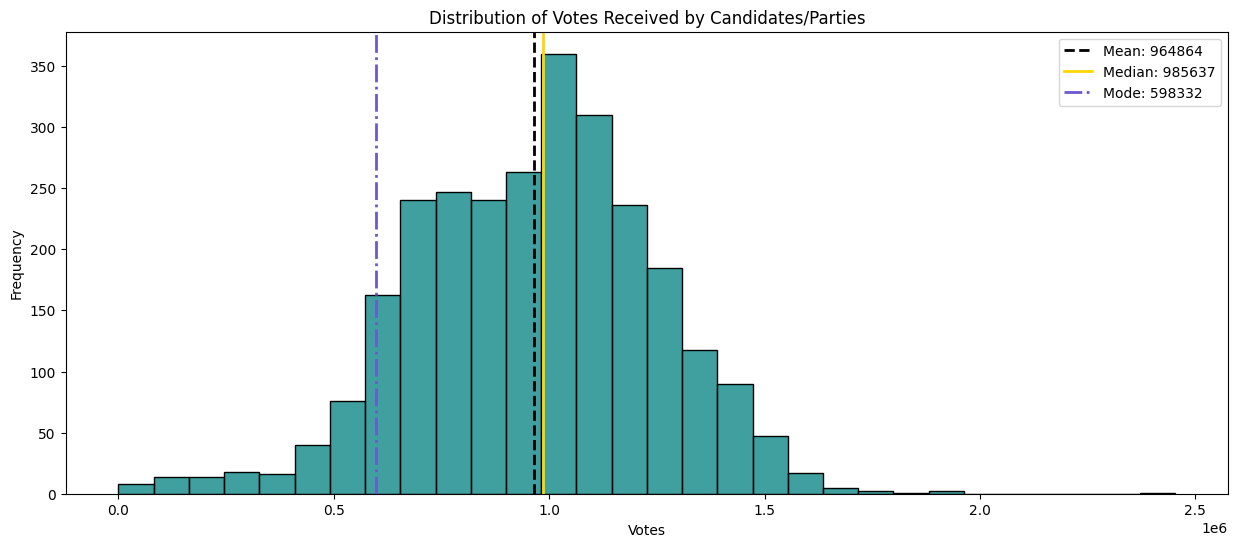

In [ ]:
# Plot the distribution of votes
plt.figure(figsize=(15, 6))
sns.histplot(df['Votes'], bins=30,color='teal')

# Plot mean, median, and mode
plt.axvline(mean_votes, color='black', linestyle='--', linewidth=2, label=f'Mean: {mean_votes:.0f}')
plt.axvline(median_votes, color='gold', linestyle='-', linewidth=2, label=f'Median: {median_votes:.0f}')
plt.axvline(mode_votes, color='slateblue', linestyle='-.', linewidth=2, label=f'Mode: {mode_votes:.0f}')

# Add labels and title
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Votes Received by Candidates/Parties')
plt.legend()

plt.show()

## **Distribution ---->**

In [ ]:
seats_won = df['Party'].value_counts()
print(seats_won)

Party
Bharatiya Janta Party                       1078
Indian National Congress                     546
Samajwadi Party                              106
All India Trinamool Congress                 106
Communist Party Of India (Marxist)            75
                                            ... 
Hindustani Awam Morcha (Secular)               1
Nationalist Democratic Progressive Party       1
United Peoples Party Liberal                   1
Zoram People’s Movement                        1
Jharkhand Vikas Morcha (Prajatantrik)          1
Name: count, Length: 78, dtype: int64


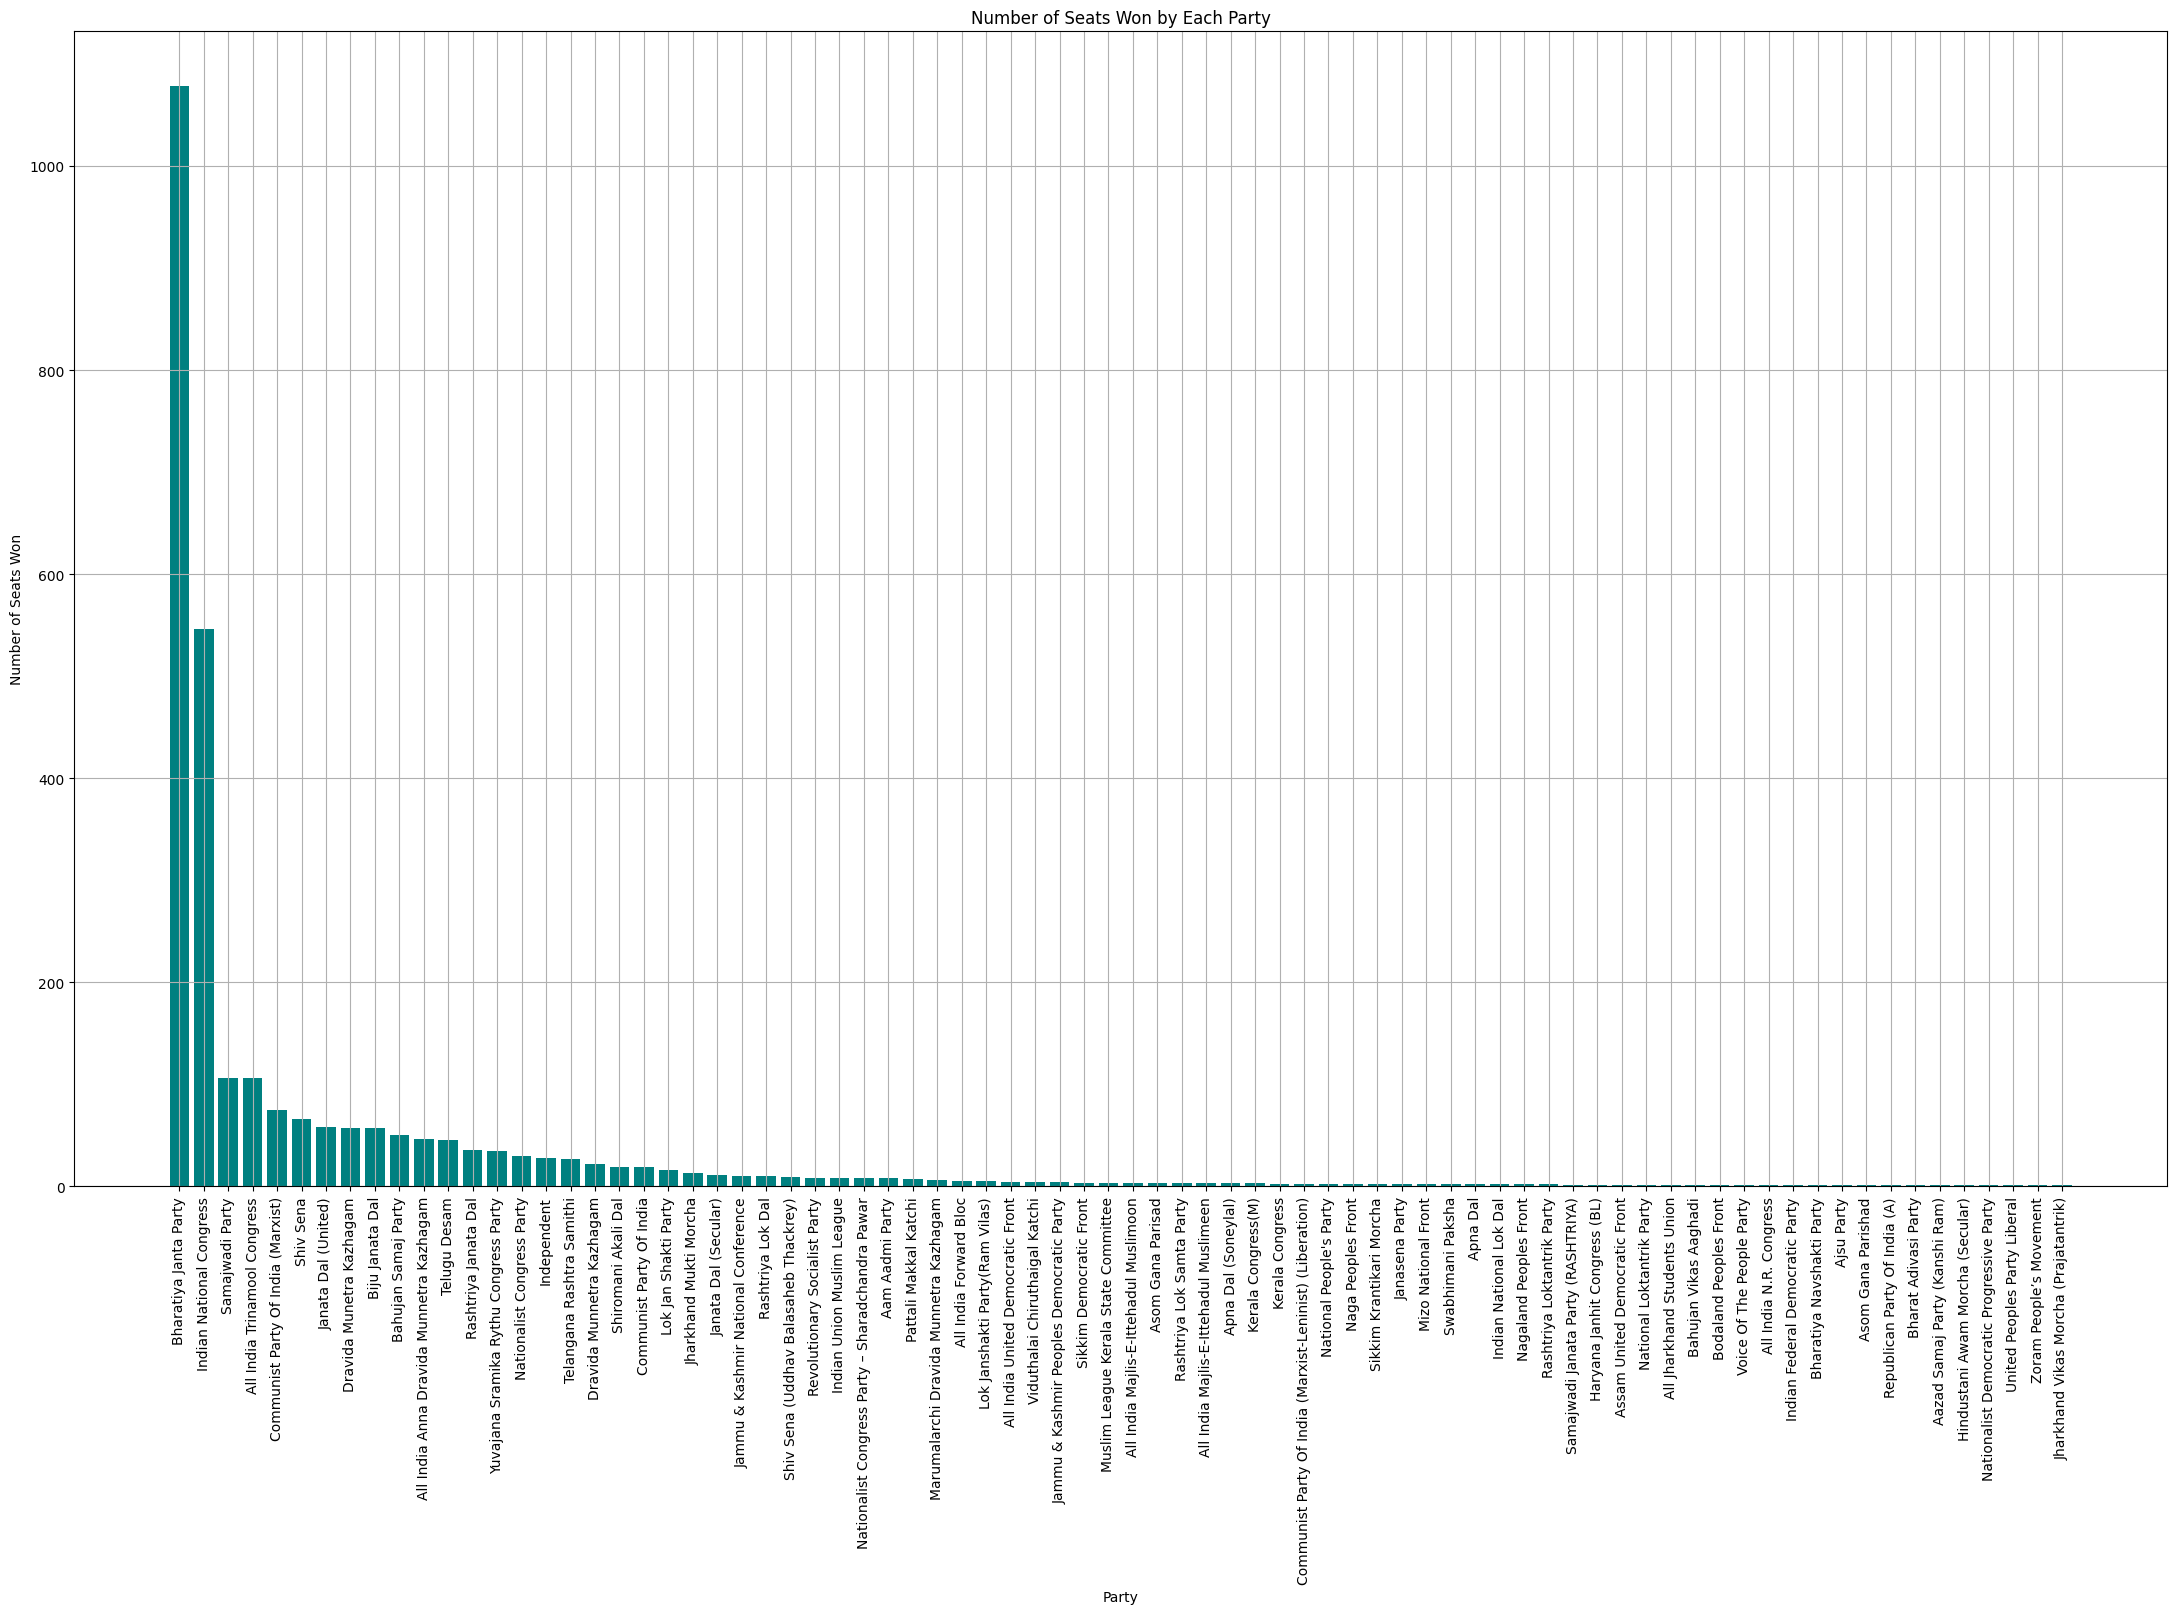

In [ ]:
plt.figure(figsize=(27, 15))
plt.bar(seats_won.index , seats_won.values ,  color = 'teal' , alpha = 1)
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Seats Won')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()